<h1>Sample Collection/Corpus of documents</h1>

We will be implementing Bag Of Words (BoW) vectorizer from scratch as well as from sklearn's library and comapare the outputs of both.

In [1]:
# Collection of string documents

corpus = [
     'the cat sat on the tree',
     'the cat and dog are the best friends',
     'there is a scarcity of mango tree and the pug dog',
     'few cat are missing',
]

<h1>BOW from Scratch Implementation</h1>

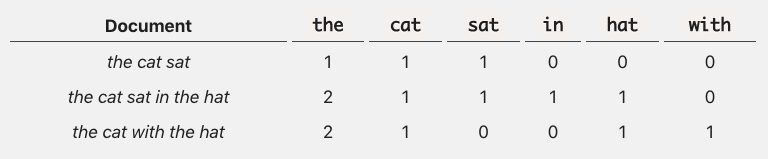

<h3>Function to find the unique words in the corpus (excluding punctuations)</h3>

In [14]:
# importing required libraries
from collections import Counter  
from scipy.sparse import csr_matrix
import math
from operator import itemgetter, attrgetter
import numpy as np

In [15]:
def unique_words(corpus): 
  unique_words_list = set()

  if isinstance(corpus, (list,)):  # corpus provided should be a list of sentences
    for row in corpus:
      for word in row.split(" "):
        if len(word) < 2:
          continue
        unique_words_list.add(word)

    unique_words_list = sorted(list(unique_words_list))  # sorting alphabetically 
    vocabulary = {j:i for i,j in enumerate(unique_words_list)}  # assigning variable for the unique words and their indices (alphabetically i.e. sorted order)

    return vocabulary
  else:
    print("Pass list of sentences")

vocabulary = unique_words(corpus)
# printing the unique set of words list
print(list(vocabulary.keys()))

['and', 'are', 'best', 'cat', 'dog', 'few', 'friends', 'is', 'mango', 'missing', 'of', 'on', 'pug', 'sat', 'scarcity', 'the', 'there', 'tree']


<h3>Function to calculate BoW value (frequency of each unique word) of unique words</h3>

In [16]:
def bow_calculate(corpus,vocabulary):
  # empty lists for storing row index, column index and tfidf values respectively
  rows, columns, values = [], [], []
  
  if isinstance(corpus, (list,)):  # corpus provided should be a list of sentences
    
    for index, row in enumerate(corpus):
      # count the number of occurrences/frequency of each unique word in the documents
      word_frequency = dict(Counter(row.split()))

      for word, frequency in word_frequency.items():
        if len(word) < 2:
          continue

        # retreiving the dimension number/column number of the unique words
        # column index is -1, it means word(key) is not present
        column_index = vocabulary.get(word, -1)
        
        # if the word is present 
        if column_index != -1:  
          # appending the rows indices, column indices
          rows.append(index)  
          columns.append(column_index)

          # calculating and storing tfidf values
          bow_value = frequency
          values.append(bow_value)

    # csr matrix used to store keys and values in sparse format # reference -https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
    return csr_matrix((values, (rows,columns)), shape=(len(corpus), len(vocabulary)))
  
  else:
    print("Pass list of strings")


# printing first line of the corpus(BoW values) in sparse matrix format
print('Sparse Matrix format - \n', bow_calculate(corpus,vocabulary)[0])

# converting sparse matrix output into dense matrix output and then printing
print('Dense Matrix format - \n', bow_calculate(corpus,vocabulary)[0].toarray())  

Sparse Matrix format - 
   (0, 3)	1
  (0, 11)	1
  (0, 13)	1
  (0, 15)	2
  (0, 17)	1
Dense Matrix format - 
 [[0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 2 0 1]]


<h1>BOW SKLearn Implementation</h1>

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# fit and transform the data
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
skl_output = vectorizer.transform(corpus)

In [18]:
# sklearn feature names, they are sorted in alphabetic order by default.
print(vectorizer.get_feature_names())

['and', 'are', 'best', 'cat', 'dog', 'few', 'friends', 'is', 'mango', 'missing', 'of', 'on', 'pug', 'sat', 'scarcity', 'the', 'there', 'tree']


In [19]:
# shape of sklearn BoW vectorizer output after applying transform method.

skl_output.shape

(4, 18)

In [20]:
# Here the output is a sparse matrix

print(skl_output[0])

  (0, 3)	1
  (0, 11)	1
  (0, 13)	1
  (0, 15)	2
  (0, 17)	1


In [21]:
# converting the sparse output matrix to dense matrix and printing it.

print(skl_output[0].toarray())

[[0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 2 0 1]]


<h1>Conclusion - </h1>
After comparing the BoW values of both the implementation, we can confirm that <u>we've calculated the BoW values of the input data corpus from scratch correctly.</u>